Training set accuracy:
Percent Type I errors: 5.087288597926896
Percent Type II errors: 17.144026186579378

Test set accuracy:
Percent Type I errors: 5.521472392638037
Percent Type II errors: 19.018404907975462


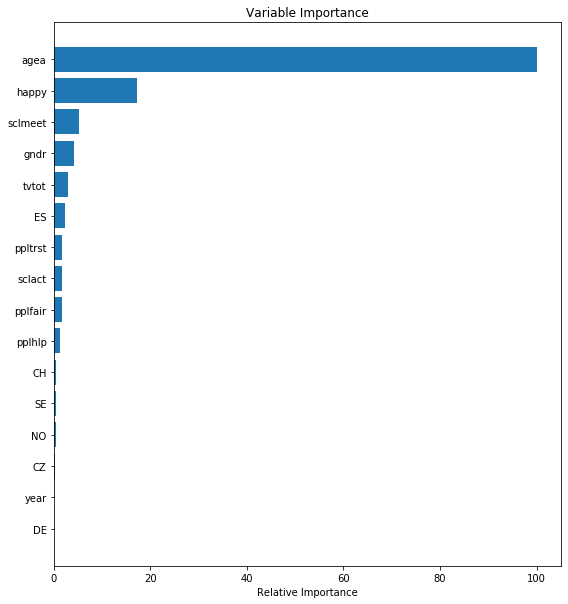

In [0]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
#offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
#X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
#X_test, y_test = X[offset:], y[offset:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 51)
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

train_tI_errors *= 100
train_tII_errors *= 100
test_tI_errors *= 100
test_tII_errors *= 100

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

##DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement. Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set. Strategies you might use include:

1. Creating new features

2. Applying more overfitting-prevention strategies like subsampling

3. More iterations

4. Trying a different loss function

5. Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

In [0]:
happy_content_df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

In [0]:
happy_content_df.isnull().sum()*100/happy_content_df.count()

cntry      0.0
idno       0.0
year       0.0
tvtot      0.0
ppltrst    0.0
pplfair    0.0
pplhlp     0.0
happy      0.0
sclmeet    0.0
sclact     0.0
gndr       0.0
agea       0.0
partner    0.0
dtype: float64

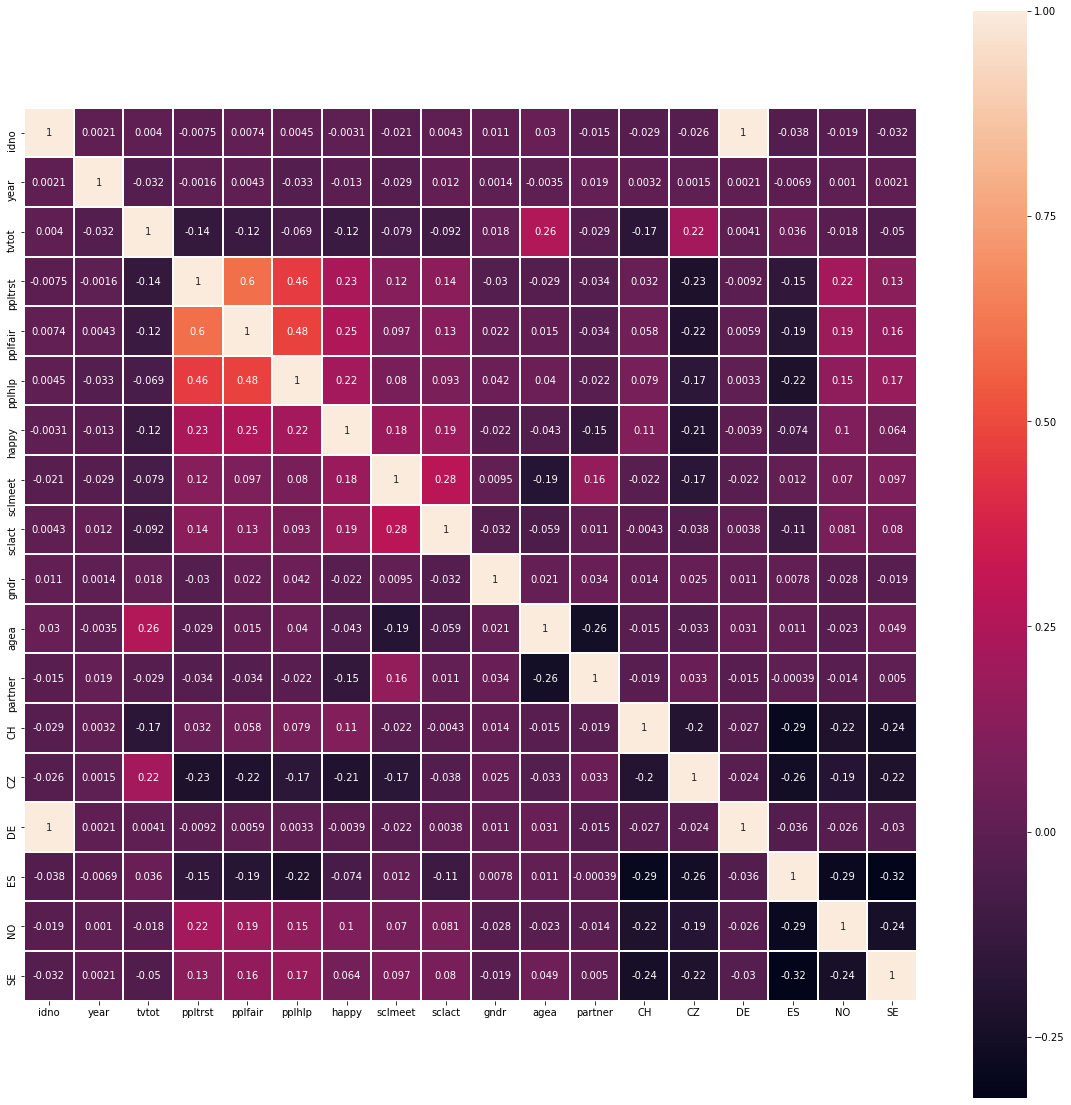

In [0]:
import seaborn as sns
corr_df = pd.concat([happy_content_df.loc[:,~happy_content_df.columns.isin(['cntry'])],pd.get_dummies(df['cntry'])], axis=1)
corrmat = corr_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, square=True, annot=True, linewidths=1)

In [0]:
happy_content_df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,6.500307,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,6.320721e+05,0.500031,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.749000e+03,7.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.778000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [0]:
happy_content_df.shape

(8147, 13)

# Adding new feature 

In [0]:
sel_col = list(happy_content_df.columns[2:-1])
happy_content_df['mod_happy'] = np.sqrt(happy_content_df['happy'])
happy_content_df['mod_agea'] = round(happy_content_df['agea']/10.0)
happy_content_df['mod_ppl'] = happy_content_df['ppltrst']+happy_content_df['pplfair']+happy_content_df['pplhlp']
happy_content_df['mod_scl'] = happy_content_df['sclmeet']+happy_content_df['sclact']
sel_col.extend(['mod_happy','mod_agea','mod_ppl','mod_scl'])

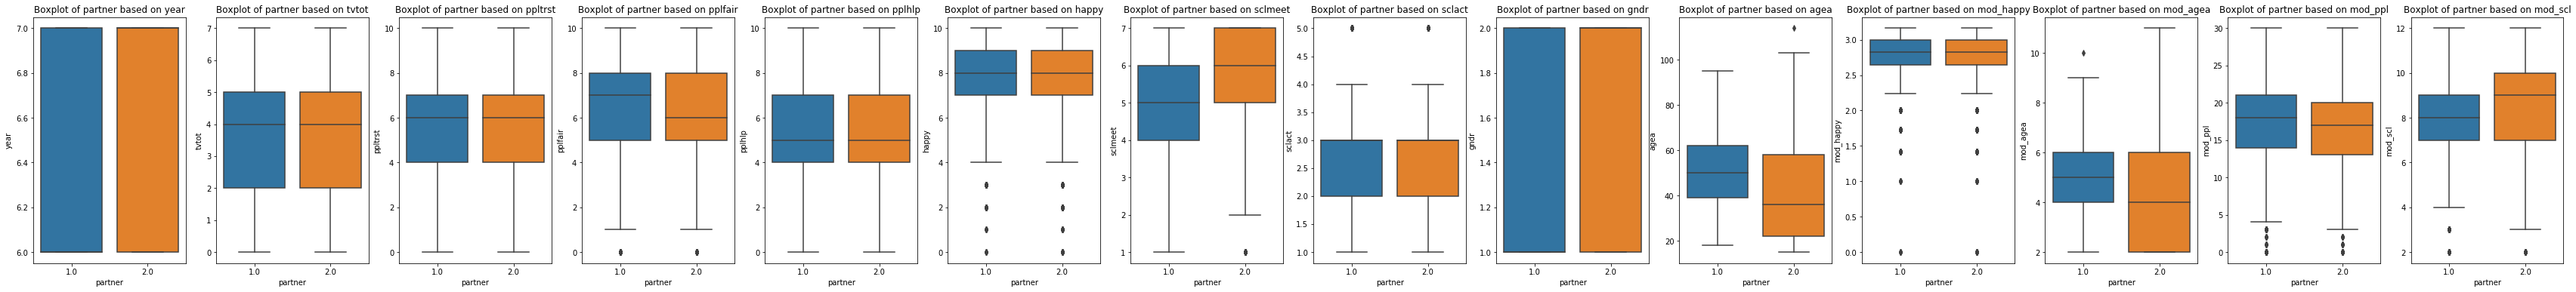

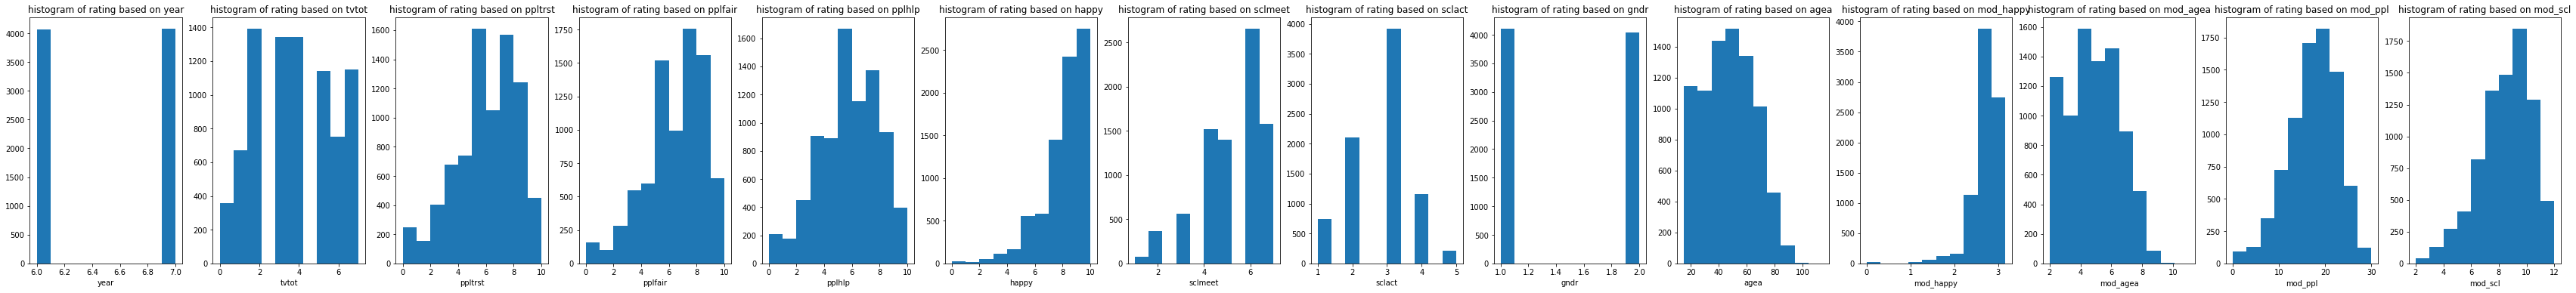

In [0]:

num = len(sel_col)
count = 0
plt.figure(figsize=(60,6))
for col in sel_col:
  count = count + 1
  plt.subplot(1, num, count)
  sns.boxplot(y=col, x="partner",data=happy_content_df)
  plt.title("Boxplot of partner based on "+col)
plt.show()

count = 0
plt.figure(figsize=(60,6))
for col in sel_col:
  count = count + 1
  plt.subplot(1, num, count)
  plt.hist(happy_content_df[col]);
  plt.title("histogram of rating based on "+col)
  plt.xlabel(col)
plt.show()

Adding two variables mod_ppl and mod_scl as follows

mod_ppl = ppltrst + pplfair + pplhlp and mod_scl = sclmeet + sclact

This improve the accuracy for TypeI errors


In [0]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = happy_content_df['partner'] - 1
X = happy_content_df.loc[:, ~happy_content_df.columns.isin(['partner', 'cntry', 'idno','mod_happy', 'mod_agea','sclmeet','sclact','pplfair','ppltrst','pplhlp'])]
#X = happy_content_df.loc[:, ~happy_content_df.columns.isin(['partner', 'cntry', 'idno','mod_happy','mod_agea','mod_scl'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(happy_content_df['cntry'])], axis=1)

# Create training and test sets.
#offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
#X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
#X_test, y_test = X[offset:], y[offset:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 51)
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']


train_tI_errors *= 100
train_tII_errors *= 100
test_tI_errors *= 100
test_tII_errors *= 100

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 4.732678668848882
Percent Type II errors: 17.74413529732679

Test set accuracy:
Percent Type I errors: 5.030674846625767
Percent Type II errors: 19.141104294478527


#Subsampling

Subsampling is ideally meant to avoid overfitting on the trainset and improve scores on the test dataset. However, in this case subsampling reduces the score on both train and test datasets meaning we are underfitting.

In [0]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = happy_content_df['partner'] - 1
X = happy_content_df.loc[:, ~happy_content_df.columns.isin(['partner', 'cntry', 'idno','mod_happy', 'mod_agea','sclmeet','sclact','pplfair','ppltrst','pplhlp'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 51)

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
          'subsample': 0.8}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

train_tI_errors *= 100
train_tII_errors *= 100
test_tI_errors *= 100
test_tII_errors *= 100

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 4.787234042553192
Percent Type II errors: 17.430441898527004

Test set accuracy:
Percent Type I errors: 4.539877300613497
Percent Type II errors: 18.773006134969325


#Iteration

By increasing the iteration to 820 we increase acuarcy for both Type I and Type II error on dataset. We also see the number of iteration increasing overfitting on training dataset. Hence a tradeoff value of 820 is decided. 

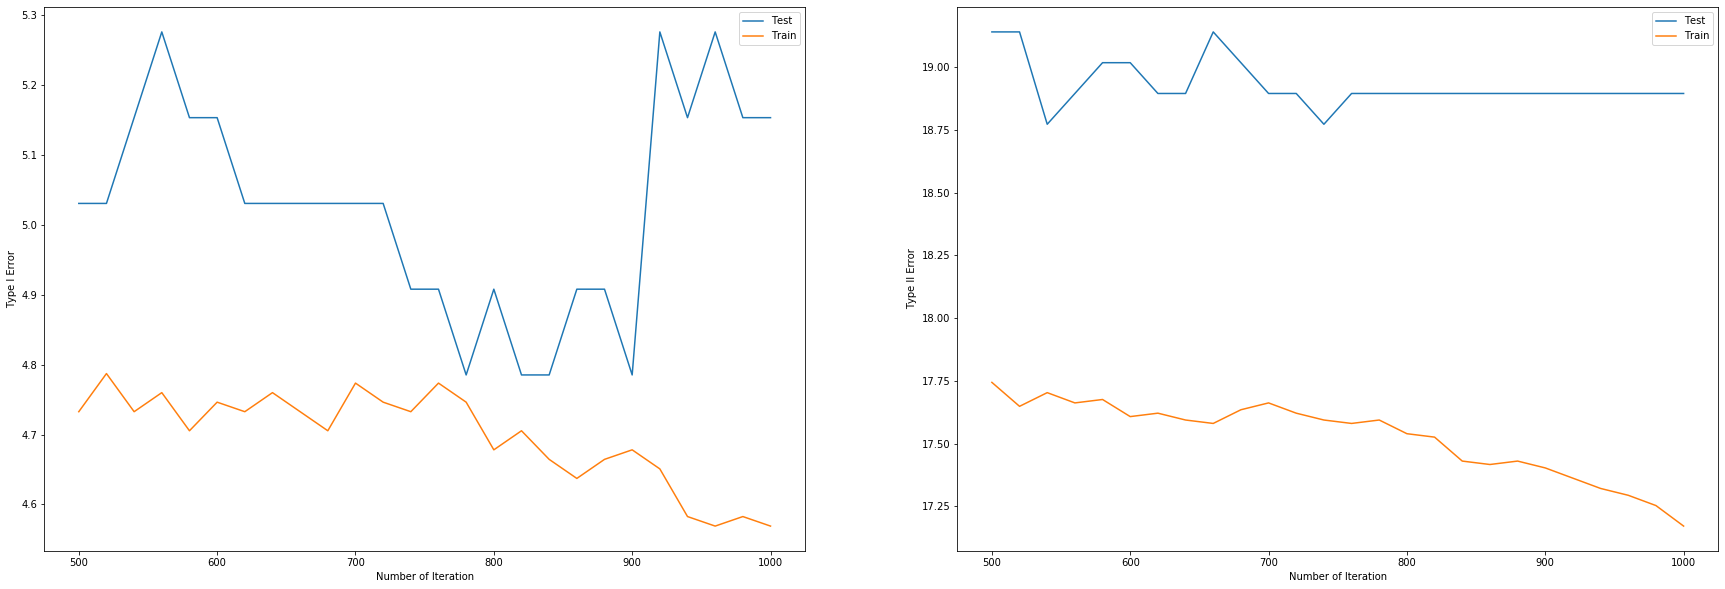

In [0]:
xaxis = np.arange(500,1010,20) 
yaxis = pd.DataFrame()
count = 0
list_a =[]
list_b =[]
list_c =[]
list_d =[]
for cnt in xaxis :
  # We'll make 500 iterations, use 2-deep trees, and set our loss function.
  params = {'n_estimators': cnt,
          'max_depth': 2,
          'loss': 'deviance'}

  # Initialize and fit the model.
  clf = ensemble.GradientBoostingClassifier(**params)
  clf.fit(X_train, y_train)

  predict_train = clf.predict(X_train)
  predict_test = clf.predict(X_test)

  # Accuracy tables.
  table_train = pd.crosstab(y_train, predict_train, margins=True)
  table_test = pd.crosstab(y_test, predict_test, margins=True)

  train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
  train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

  test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
  test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
  list_a.append(train_tI_errors*100)
  list_b.append(train_tII_errors*100)
  list_c.append(test_tI_errors*100)
  list_d.append(test_tII_errors*100)
  count += 1
yaxis['iter'] = xaxis
yaxis['train_tI_errors'] = list_a
yaxis['train_tII_errors'] = list_b
yaxis['test_tI_errors'] = list_c
yaxis['test_tII_errors'] = list_d

plt.figure(figsize=(30,10))
plt.subplot(1, 2, 1)
plt.plot(yaxis['iter'],yaxis['test_tI_errors'])
plt.plot(yaxis['iter'],yaxis['train_tI_errors'])
plt.legend(['Test','Train'])
plt.xlabel('Number of Iteration')
plt.ylabel('Type I Error')

plt.subplot(1, 2, 2)
plt.plot(yaxis['iter'],yaxis['test_tII_errors'])
plt.plot(yaxis['iter'],yaxis['train_tII_errors'])
plt.legend(['Test','Train'])
plt.xlabel('Number of Iteration')
plt.ylabel('Type II Error')
plt.show()

In [0]:
yaxis[yaxis['test_tI_errors']<4.8]

,iter,train_tI_errors,train_tII_errors,test_tI_errors,test_tII_errors
14,780,4.746318,17.594108,4.785276,18.895706
16,820,4.705401,17.525914,4.785276,18.895706
17,840,4.664484,17.430442,4.785276,18.895706
20,900,4.678123,17.403164,4.785276,18.895706


In [0]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = happy_content_df['partner'] - 1
X = happy_content_df.loc[:, ~happy_content_df.columns.isin(['partner', 'cntry', 'idno','mod_happy', 'mod_agea','sclmeet','sclact','pplfair','ppltrst','pplhlp'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 51)

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 820,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
train_tI_errors *= 100
train_tII_errors *= 100
test_tI_errors *= 100
test_tII_errors *= 100

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 4.705400981996727
Percent Type II errors: 17.525913802509546

Test set accuracy:
Percent Type I errors: 4.785276073619632
Percent Type II errors: 18.89570552147239


#Max Depth changing

Maxdepth to 3 doesnt increase the accuarcy.

In [0]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = happy_content_df['partner'] - 1
X = happy_content_df.loc[:, ~happy_content_df.columns.isin(['partner', 'cntry', 'idno','mod_happy', 'mod_agea','sclmeet','sclact','pplfair','ppltrst','pplhlp'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 51)

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 160,
          'max_depth': 3,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

train_tI_errors *= 100
train_tII_errors *= 100
test_tI_errors *= 100
test_tII_errors *= 100

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 4.323513366066558
Percent Type II errors: 17.62138570649209

Test set accuracy:
Percent Type I errors: 4.9079754601226995
Percent Type II errors: 18.89570552147239


#Different Loss Function

Exponential loss function also doesnt yield any better accuracy.

In [0]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = happy_content_df['partner'] - 1
X = happy_content_df.loc[:, ~happy_content_df.columns.isin(['partner', 'cntry', 'idno','mod_happy', 'mod_agea','sclmeet','sclact','pplfair','ppltrst','pplhlp'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 46)

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 820,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

train_tI_errors *= 100
train_tII_errors *= 100
test_tI_errors *= 100
test_tII_errors *= 100


print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 4.708261120739457
Percent Type II errors: 17.143269786250723

Test set accuracy:
Percent Type I errors: 6.132461161079314
Percent Type II errors: 21.668029435813573


#Changing the learning rate 

In [0]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = happy_content_df['partner'] - 1
X = happy_content_df.loc[:, ~happy_content_df.columns.isin(['partner', 'cntry', 'idno','mod_happy', 'mod_agea','sclmeet','sclact','pplfair','ppltrst','pplhlp'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 51)

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 820,
          'max_depth': 2,
          'loss': 'deviance',
          'learning_rate': 0.5}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

train_tI_errors *= 100
train_tII_errors *= 100
test_tI_errors *= 100
test_tII_errors *= 100
print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 3.856152512998267
Percent Type II errors: 15.135759676487579

Test set accuracy:
Percent Type I errors: 6.623058053965658
Percent Type II errors: 19.70564186426819


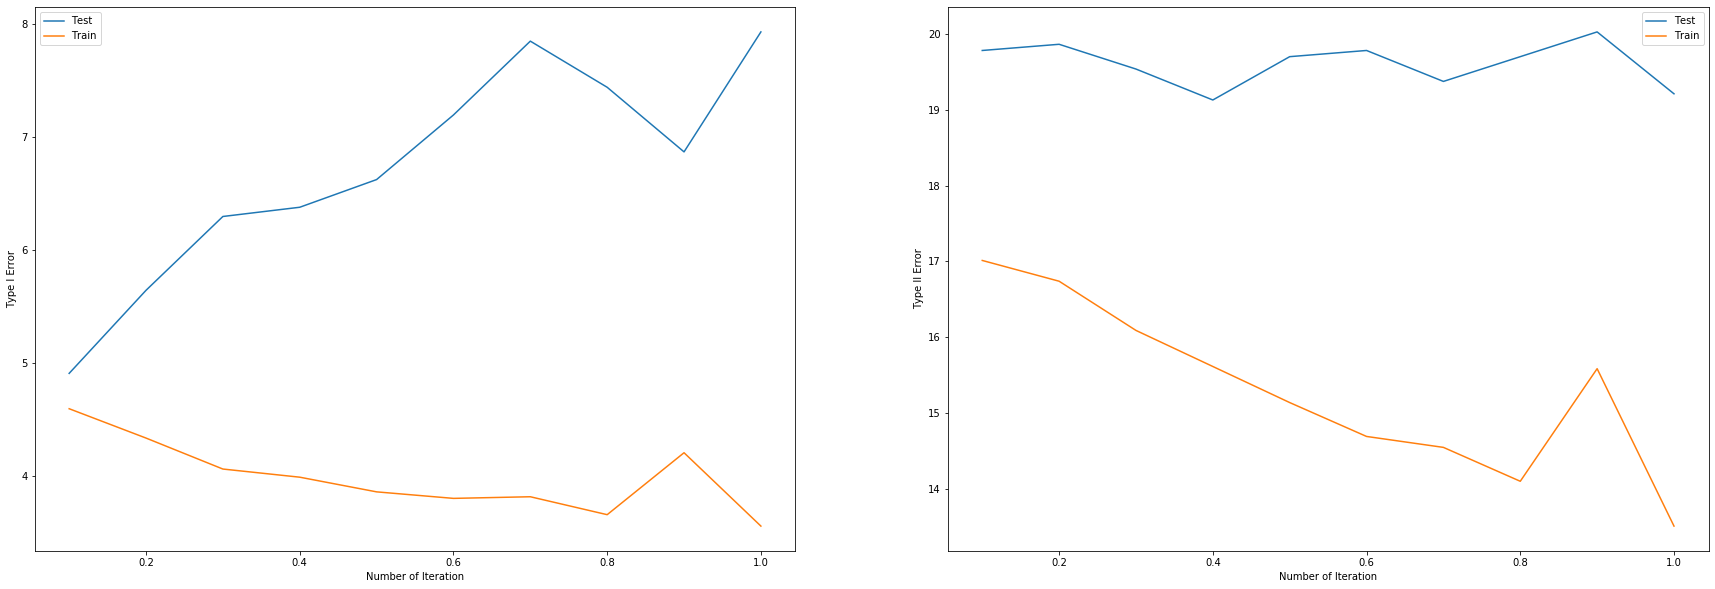

In [0]:
xaxis = np.arange(0.1,1.1,0.1) 
yaxis = pd.DataFrame()
count = 0
list_a =[]
list_b =[]
list_c =[]
list_d =[]
for cnt in xaxis :
  # We'll make 500 iterations, use 2-deep trees, and set our loss function.
  params = {'n_estimators': 820,
          'max_depth': 2,
          'loss': 'deviance',
          'learning_rate': cnt}

  # Initialize and fit the model.
  clf = ensemble.GradientBoostingClassifier(**params)
  clf.fit(X_train, y_train)

  predict_train = clf.predict(X_train)
  predict_test = clf.predict(X_test)

  # Accuracy tables.
  table_train = pd.crosstab(y_train, predict_train, margins=True)
  table_test = pd.crosstab(y_test, predict_test, margins=True)

  train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
  train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

  test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
  test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
  list_a.append(train_tI_errors*100)
  list_b.append(train_tII_errors*100)
  list_c.append(test_tI_errors*100)
  list_d.append(test_tII_errors*100)
  count += 1
yaxis['iter'] = xaxis
yaxis['train_tI_errors'] = list_a
yaxis['train_tII_errors'] = list_b
yaxis['test_tI_errors'] = list_c
yaxis['test_tII_errors'] = list_d

plt.figure(figsize=(30,10))
plt.subplot(1, 2, 1)
plt.plot(yaxis['iter'],yaxis['test_tI_errors'])
plt.plot(yaxis['iter'],yaxis['train_tI_errors'])
plt.legend(['Test','Train'])
plt.xlabel('Number of Iteration')
plt.ylabel('Type I Error')

plt.subplot(1, 2, 2)
plt.plot(yaxis['iter'],yaxis['test_tII_errors'])
plt.plot(yaxis['iter'],yaxis['train_tII_errors'])
plt.legend(['Test','Train'])
plt.xlabel('Number of Iteration')
plt.ylabel('Type II Error')
plt.show()